In [63]:
#libraries
import pandas as pd
import numpy as np
import folium as folium
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data
dim_cd_df = pd.read_csv('../data/interim_data/dim_cd_df.csv',index_col=0)
dim_qq_df = pd.read_csv('../data/interim_data/dim_qq_df.csv',index_col=0)
FACT_df = pd.read_csv('../data/interim_data/FACT_df.csv',index_col=0)

In [4]:
#Create a map
map1 = folium.Map(
    tiles='cartodbpositron',
    zoom_start=12)

dim_cd_df.apply(lambda row:folium.CircleMarker(radius=3,location=[row["lat"], row["long"]],fill=False,color='blue').add_to(map1),axis=1)

map1

In [5]:
FACT_df

,Account_Num,Year,Question_ID,Answer
0,1093,2019,18980,Renew Atlanta is an infrastructure improvement...
1,1499,2019,18980,Barcelona City Council is working to promote a...
2,2430,2019,18980,"In order to achieve net zero energy status, at..."
3,3422,2019,18980,Mayor's energy efficiency programmes for both ...
4,10495,2019,18980,"In 2011, The City of Las Vegas selected stree..."
...,...,...,...,...
1542490,834163,2019,13054,High
1542492,834163,2019,12910,IPCC
1542493,834163,2019,13090,Be able to reduce 10% of GHG emissions from ho...
1542494,834163,2019,13018,7002


In [14]:
dim_cd_df.head()

,Reporting_Year,Account_Num,Org,City,Country,CDP_Reg,Reporting_Auth,Access,First_Time_Disc,Pop,Pop_Year,geometry,Last_Update,lat,long
0,2019,1093,City of Atlanta,Atlanta,United States of America,North America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,450182.0,2017.0,POINT (-84.388 33.749),2020-06-25T04:52:51.327,33.7490,-84.3880
1,2018,1093,City of Atlanta,Atlanta,United States of America,North America,CDP Cities,public,No,450182.0,2017.0,POINT (-84.388 33.749),2020-06-25T04:52:49.050,33.7490,-84.3880
2,2018,1184,City of Austin,Austin,United States of America,North America,"C40,CDP Cities",public,No,1265974.0,2017.0,POINT (-97.7431 30.2672),2020-06-25T04:52:49.050,30.2672,-97.7431
3,2020,1184,City of Austin,Austin,United States of America,North America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,964254.0,2019.0,POINT (-97.7431 30.2672),2020-09-07T09:45:19.793,30.2672,-97.7431
4,2019,1184,City of Austin,Austin,United States of America,North America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,1227000.0,2017.0,POINT (-97.7431 30.2672),2020-06-25T04:52:51.327,30.2672,-97.7431


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'North America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Southeast Asia and Oceania'),
  Text(3, 0, 'East Asia'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Latin America'),
  Text(6, 0, 'South and West Asia'),
  Text(7, 0, 'Middle East')])

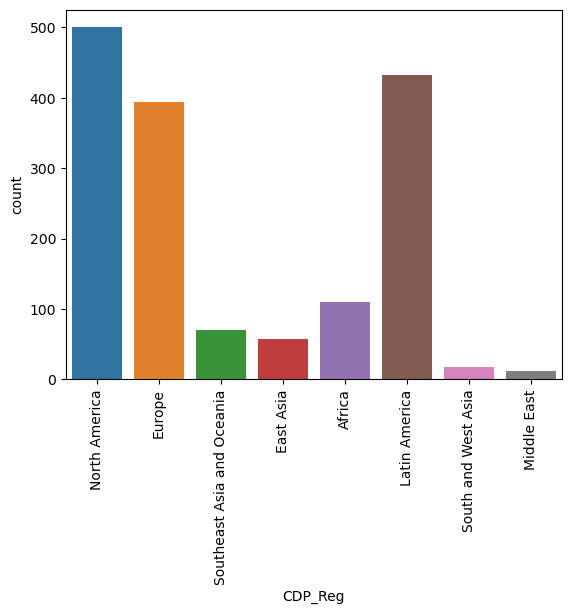

In [52]:
#Counts of data per CDP region
plt.figsize=(12,5)
sns.countplot(data=dim_cd_df, x="CDP_Reg")
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Country'>

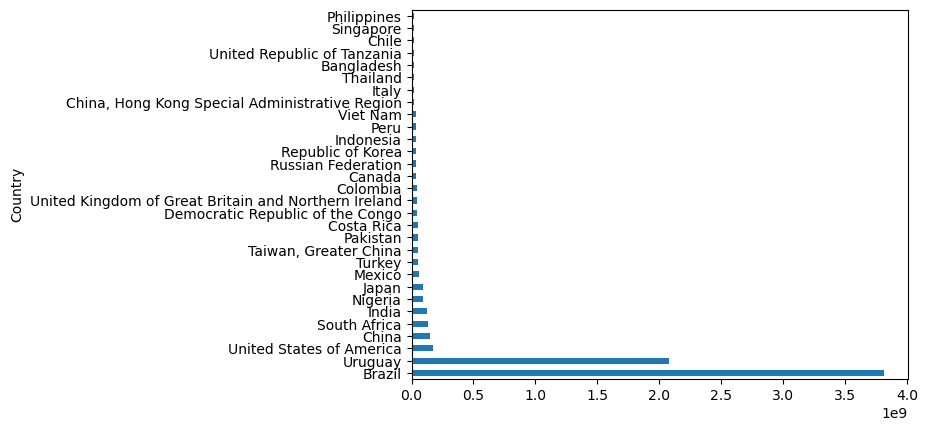

In [81]:
#lets review largest countries by population (that submitted CDP disclosures)
dim_cd_df.groupby('Country')['Pop'].sum().sort_values(ascending=False).head(30).plot(kind='barh')